In [1]:
# + дисбаланс классов
# + посмотреть, что на каггле

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Часть 1. EDA

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
del df['customerID'] # удаляем id

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Данные в поле SeniorCitizen - это булевые значения. Закодируем их как True и False
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [10]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

In [11]:
df['Churn'].value_counts(normalize=True)

No     0.735508
Yes    0.264492
Name: Churn, dtype: float64

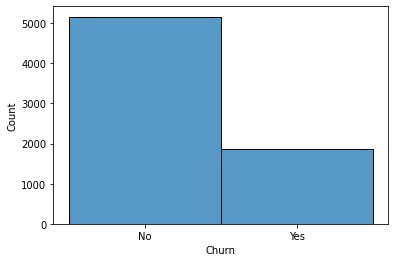

In [12]:
# Распределение целевой переменной diagnosis
sns.histplot(df, x="Churn", );

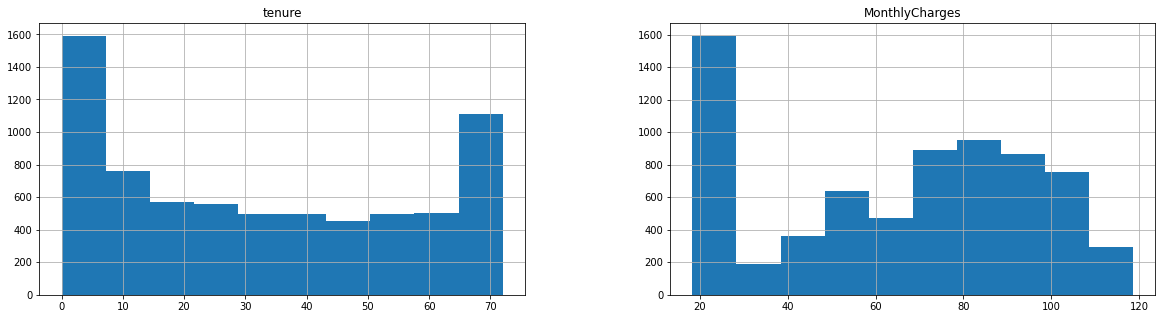

In [13]:
# Визуализируем распределение числовых признаков
df.hist(figsize = (20, 5));

In [14]:
columns = list(df.columns)
columns.remove('Churn')
len(columns)

19

In [15]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


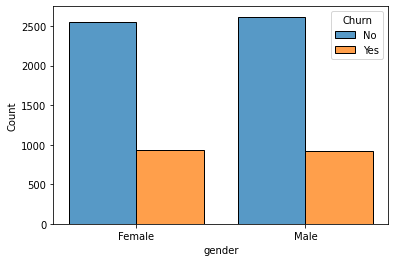

In [16]:
sns.histplot(data=df, x='gender', hue='Churn', multiple="dodge", shrink=.8);

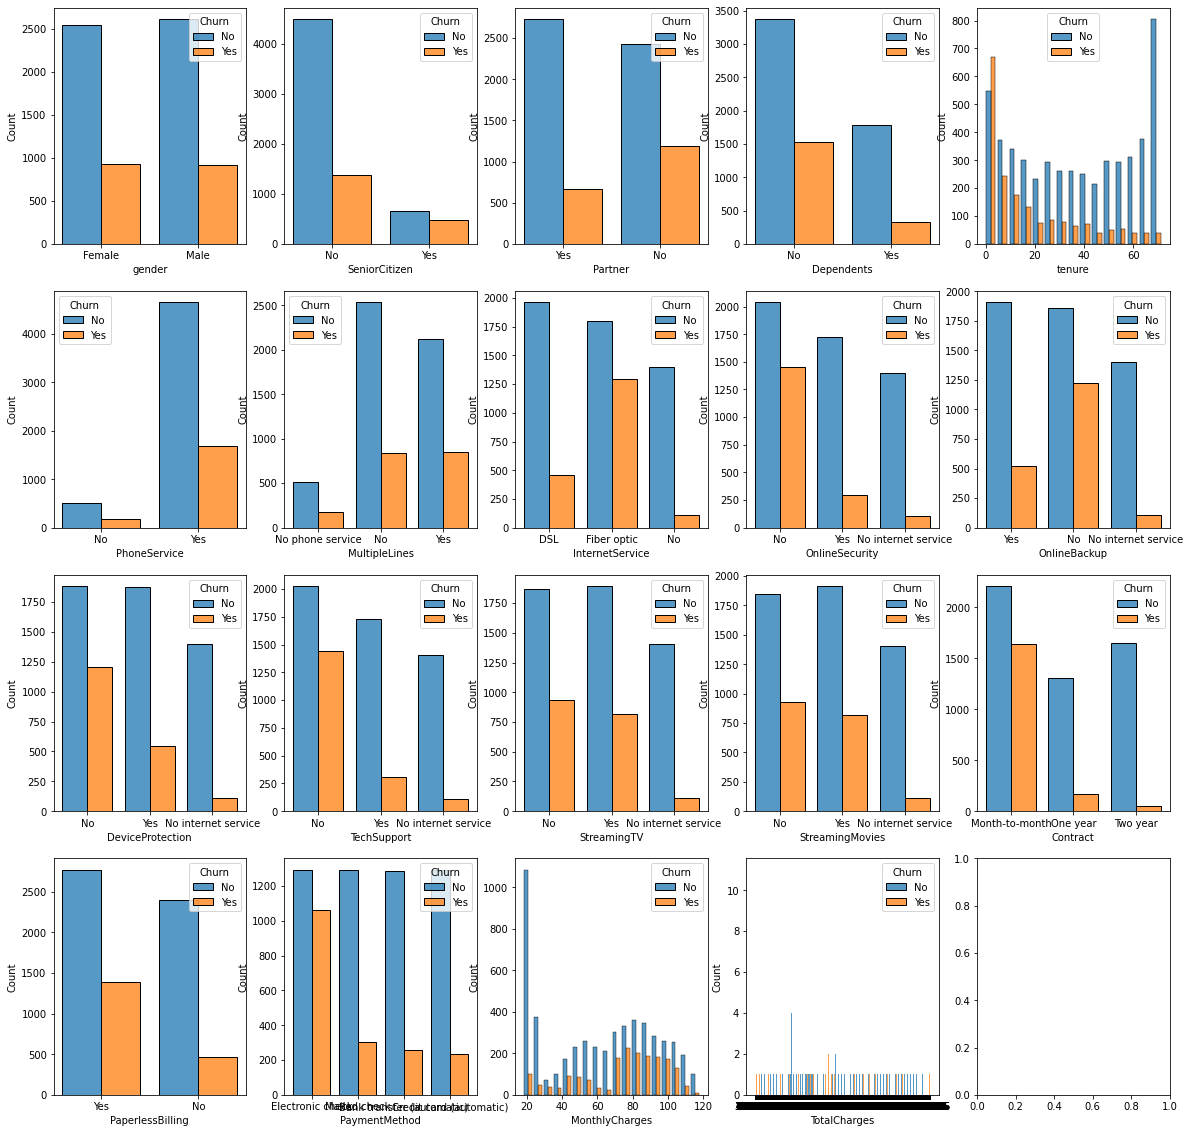

In [17]:
# возможно переделать на boxplot?

fig, axes = plt.subplots(4, 5, figsize=(20, 20))
sns.histplot(ax=axes[0, 0], data=df, x='gender', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[0, 1], data=df, x='SeniorCitizen', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[0, 2], data=df, x='Partner', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[0, 3], data=df, x='Dependents', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[0, 4], data=df, x='tenure', hue='Churn', multiple="dodge", shrink=.8);

sns.histplot(ax=axes[1, 0], data=df, x='PhoneService', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[1, 1], data=df, x='MultipleLines', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[1, 2], data=df, x='InternetService', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[1, 3], data=df, x='OnlineSecurity', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[1, 4], data=df, x='OnlineBackup', hue='Churn', multiple="dodge", shrink=.8);

sns.histplot(ax=axes[2, 0], data=df, x='DeviceProtection', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[2, 1], data=df, x='TechSupport', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[2, 2], data=df, x='StreamingTV', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[2, 3], data=df, x='StreamingMovies', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[2, 4], data=df, x='Contract', hue='Churn', multiple="dodge", shrink=.8);

sns.histplot(ax=axes[3, 0], data=df, x='PaperlessBilling', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[3, 1], data=df, x='PaymentMethod', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[3, 2], data=df, x='MonthlyCharges', hue='Churn', multiple="dodge", shrink=.8);
sns.histplot(ax=axes[3, 3], data=df, x='TotalCharges', hue='Churn', multiple="dodge", shrink=.8);

In [18]:
df.corr()#correlation map

,tenure,MonthlyCharges
tenure,1.000000,0.245251
MonthlyCharges,0.245251,1.000000


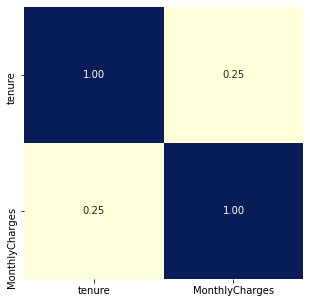

In [19]:
#correlation map
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, cbar=False, fmt= '.2f')
plt.show()

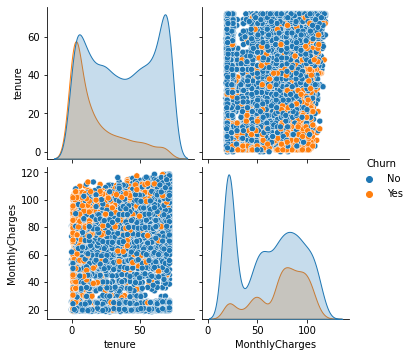

In [20]:
sns.pairplot(df, hue='Churn');

In [21]:
# построить графики зависимостей

# Часть 2. Preprocessing & Feature Engineering

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
# Выбираем поля с типом object 
columns_for_encode = df.select_dtypes(include=['object']).columns
for column in columns_for_encode:
    le.fit(df[column])
    df[column] = le.transform(df[column])

In [25]:
# Добавить новые переменные

In [26]:
# Разбиваем данные на тренировочные и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn'], axis=1), df['Churn'], test_size=0.30, random_state=42, stratify=df['Churn'])

# Часть 3. Who's the mightiest of them all? <br><br>
## Строим модели из коробки

In [27]:
# построим ROC-кривую
def plot_roc_curve(y_test, y_pred):
    fper, tper, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='green', label=f'ROC-кривая (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC (area = {roc_auc:.3f})')
    plt.legend(loc="lower right")
    plt.show()

In [28]:
### Quality func
def quality_report(prediction, actual):
    print((f" Accuracy: {accuracy_score(prediction, actual):.3f}\n \
Precision: {precision_score(prediction, actual):.3f}\n \
Recall: {recall_score(prediction, actual):.3f}\n \
f1_score: {f1_score(prediction, actual):.3f}"))

### sklearn 

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

Train quality:
 Accuracy: 0.829
 Precision: 0.565
 Recall: 0.728
 f1_score: 0.636

Test quality:
 Accuracy: 0.799
 Precision: 0.494
 Recall: 0.659
 f1_score: 0.565


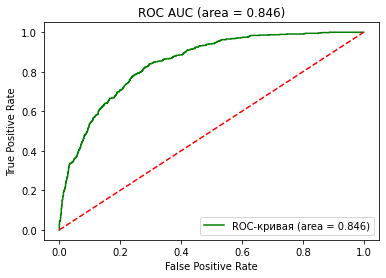

In [39]:
sklearn_model = GradientBoostingClassifier(random_state=42)
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(sklearn_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(sklearn_model.predict(X_test), y_test)

plot_roc_curve(y_test, sklearn_model.predict_proba(X_test)[:,1])

### lightgbm

Train quality:
 Accuracy: 0.895
 Precision: 0.747
 Recall: 0.837
 f1_score: 0.789

Test quality:
 Accuracy: 0.793
 Precision: 0.496
 Recall: 0.639
 f1_score: 0.558


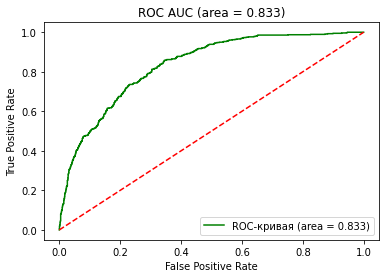

In [40]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(lgb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(lgb_model.predict(X_test), y_test)

plot_roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])

### xgboost

In [33]:
from xgboost import XGBClassifier

Train quality:
 Accuracy: 0.956
 Precision: 0.887
 Recall: 0.944
 f1_score: 0.914

Test quality:
 Accuracy: 0.779
 Precision: 0.485
 Recall: 0.601
 f1_score: 0.537


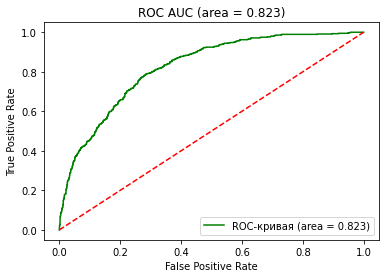

In [41]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(xgb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(xgb_model.predict(X_test), y_test)

plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

### catboost

In [35]:
from catboost import CatBoostClassifier, Pool, metrics, cv

Learning rate set to 0.020332
0:	learn: 0.6794192	total: 3.74ms	remaining: 3.74s
1:	learn: 0.6656813	total: 6.52ms	remaining: 3.25s
2:	learn: 0.6534964	total: 8.08ms	remaining: 2.69s
3:	learn: 0.6425672	total: 10.7ms	remaining: 2.67s
4:	learn: 0.6306695	total: 13.3ms	remaining: 2.64s
5:	learn: 0.6199769	total: 16.2ms	remaining: 2.68s
6:	learn: 0.6110647	total: 18.6ms	remaining: 2.64s
7:	learn: 0.6013509	total: 22.2ms	remaining: 2.75s
8:	learn: 0.5917001	total: 24.6ms	remaining: 2.71s
9:	learn: 0.5822812	total: 26.7ms	remaining: 2.64s
10:	learn: 0.5746648	total: 29ms	remaining: 2.61s
11:	learn: 0.5670118	total: 31.6ms	remaining: 2.6s
12:	learn: 0.5598694	total: 33.7ms	remaining: 2.56s
13:	learn: 0.5534478	total: 35.9ms	remaining: 2.53s
14:	learn: 0.5479611	total: 38.3ms	remaining: 2.51s
15:	learn: 0.5417534	total: 40.2ms	remaining: 2.47s
16:	learn: 0.5358448	total: 42.4ms	remaining: 2.45s
17:	learn: 0.5299410	total: 44.6ms	remaining: 2.44s
18:	learn: 0.5259334	total: 46.1ms	remaining: 2

232:	learn: 0.3717437	total: 385ms	remaining: 1.27s
233:	learn: 0.3716302	total: 387ms	remaining: 1.27s
234:	learn: 0.3715039	total: 388ms	remaining: 1.26s
235:	learn: 0.3713456	total: 390ms	remaining: 1.26s
236:	learn: 0.3712109	total: 392ms	remaining: 1.26s
237:	learn: 0.3710759	total: 393ms	remaining: 1.26s
238:	learn: 0.3709154	total: 396ms	remaining: 1.26s
239:	learn: 0.3707640	total: 397ms	remaining: 1.26s
240:	learn: 0.3706439	total: 400ms	remaining: 1.26s
241:	learn: 0.3705196	total: 401ms	remaining: 1.26s
242:	learn: 0.3703412	total: 402ms	remaining: 1.25s
243:	learn: 0.3701897	total: 404ms	remaining: 1.25s
244:	learn: 0.3699694	total: 406ms	remaining: 1.25s
245:	learn: 0.3698371	total: 407ms	remaining: 1.25s
246:	learn: 0.3696369	total: 409ms	remaining: 1.25s
247:	learn: 0.3694250	total: 411ms	remaining: 1.25s
248:	learn: 0.3693255	total: 412ms	remaining: 1.24s
249:	learn: 0.3691722	total: 414ms	remaining: 1.24s
250:	learn: 0.3690228	total: 416ms	remaining: 1.24s
251:	learn: 

468:	learn: 0.3372032	total: 771ms	remaining: 873ms
469:	learn: 0.3370571	total: 774ms	remaining: 873ms
470:	learn: 0.3369042	total: 776ms	remaining: 872ms
471:	learn: 0.3367783	total: 778ms	remaining: 870ms
472:	learn: 0.3365822	total: 780ms	remaining: 869ms
473:	learn: 0.3364900	total: 781ms	remaining: 867ms
474:	learn: 0.3363749	total: 784ms	remaining: 866ms
475:	learn: 0.3361724	total: 785ms	remaining: 865ms
476:	learn: 0.3360658	total: 787ms	remaining: 863ms
477:	learn: 0.3359496	total: 789ms	remaining: 861ms
478:	learn: 0.3357396	total: 791ms	remaining: 860ms
479:	learn: 0.3356359	total: 792ms	remaining: 858ms
480:	learn: 0.3355362	total: 794ms	remaining: 857ms
481:	learn: 0.3353484	total: 795ms	remaining: 855ms
482:	learn: 0.3352284	total: 797ms	remaining: 853ms
483:	learn: 0.3351177	total: 799ms	remaining: 851ms
484:	learn: 0.3349928	total: 800ms	remaining: 849ms
485:	learn: 0.3348189	total: 801ms	remaining: 848ms
486:	learn: 0.3347061	total: 803ms	remaining: 846ms
487:	learn: 

706:	learn: 0.3104380	total: 1.16s	remaining: 480ms
707:	learn: 0.3103544	total: 1.16s	remaining: 478ms
708:	learn: 0.3102554	total: 1.16s	remaining: 476ms
709:	learn: 0.3101335	total: 1.16s	remaining: 475ms
710:	learn: 0.3100302	total: 1.16s	remaining: 473ms
711:	learn: 0.3099544	total: 1.17s	remaining: 471ms
712:	learn: 0.3098674	total: 1.17s	remaining: 470ms
713:	learn: 0.3097520	total: 1.17s	remaining: 468ms
714:	learn: 0.3096065	total: 1.17s	remaining: 466ms
715:	learn: 0.3094659	total: 1.17s	remaining: 465ms
716:	learn: 0.3093724	total: 1.17s	remaining: 463ms
717:	learn: 0.3092621	total: 1.17s	remaining: 461ms
718:	learn: 0.3091535	total: 1.18s	remaining: 460ms
719:	learn: 0.3090505	total: 1.18s	remaining: 458ms
720:	learn: 0.3089953	total: 1.18s	remaining: 457ms
721:	learn: 0.3088392	total: 1.18s	remaining: 455ms
722:	learn: 0.3087235	total: 1.18s	remaining: 453ms
723:	learn: 0.3085787	total: 1.18s	remaining: 452ms
724:	learn: 0.3084955	total: 1.19s	remaining: 450ms
725:	learn: 

946:	learn: 0.2871873	total: 1.54s	remaining: 86.4ms
947:	learn: 0.2870721	total: 1.54s	remaining: 84.8ms
948:	learn: 0.2869739	total: 1.55s	remaining: 83.1ms
949:	learn: 0.2869224	total: 1.55s	remaining: 81.5ms
950:	learn: 0.2868844	total: 1.55s	remaining: 79.9ms
951:	learn: 0.2868377	total: 1.55s	remaining: 78.3ms
952:	learn: 0.2866737	total: 1.55s	remaining: 76.6ms
953:	learn: 0.2865874	total: 1.55s	remaining: 75ms
954:	learn: 0.2864963	total: 1.56s	remaining: 73.4ms
955:	learn: 0.2864479	total: 1.56s	remaining: 71.7ms
956:	learn: 0.2863681	total: 1.56s	remaining: 70.1ms
957:	learn: 0.2862465	total: 1.56s	remaining: 68.5ms
958:	learn: 0.2861909	total: 1.56s	remaining: 66.8ms
959:	learn: 0.2861297	total: 1.56s	remaining: 65.2ms
960:	learn: 0.2860778	total: 1.57s	remaining: 63.6ms
961:	learn: 0.2860214	total: 1.57s	remaining: 62ms
962:	learn: 0.2859545	total: 1.57s	remaining: 60.3ms
963:	learn: 0.2858621	total: 1.57s	remaining: 58.7ms
964:	learn: 0.2857325	total: 1.57s	remaining: 57.1

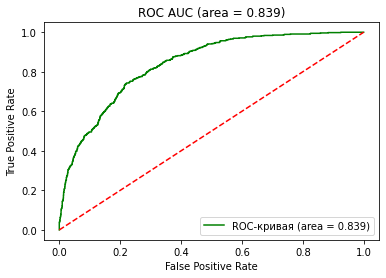

In [42]:
ctb_model = CatBoostClassifier(random_state=42)
ctb_model.fit(X_train, y_train)

y_pred = ctb_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(ctb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(ctb_model.predict(X_test), y_test)

plot_roc_curve(y_test, ctb_model.predict_proba(X_test)[:,1])

In [43]:
print(classification_report(y_test,ctb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1550
           1       0.65      0.49      0.56       557

    accuracy                           0.79      2107
   macro avg       0.74      0.70      0.71      2107
weighted avg       0.78      0.79      0.79      2107



## Настройка гиперпараметров

In [38]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'n_estimators': [10, 50, 100, 250, 500, 1000]}

### sklearn

In [46]:
tuning_sklearn = GridSearchCV(estimator=GradientBoostingClassifier(
                                                          random_state=42), 
                              param_grid=parameters)

tuning_sklearn.fit(X_train,y_train)
result_cv = pd.DataFrame(tuning_sklearn.cv_results_)

# get best params 
print(result_cv[result_cv['rank_test_score'] == 1].params)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

Train quality:
 Accuracy: 0.821
 Precision: 0.533
 Recall: 0.716
 f1_score: 0.611

Test quality:
 Accuracy: 0.802
 Precision: 0.476
 Recall: 0.678
 f1_score: 0.559


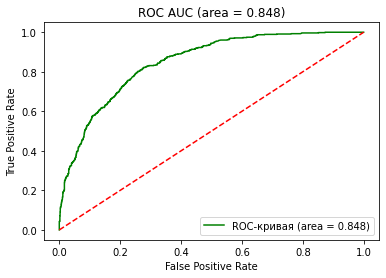

In [69]:
sklearn_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100)
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(sklearn_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(sklearn_model.predict(X_test), y_test)

plot_roc_curve(y_test, sklearn_model.predict_proba(X_test)[:,1])

### lightgbm

In [67]:
lgb_model = LGBMClassifier(random_state=42)
tuning_lgb = GridSearchCV(lgb_model, param_grid = parameters)
tuning_lgb.fit(X_train,y_train)
result_cv = pd.DataFrame(tuning_lgb.cv_results_)

# get best params 
print(result_cv[result_cv['rank_test_score'] == 1].params)

8    {'learning_rate': 0.025, 'n_estimators': 100}
Name: params, dtype: object


Train quality:
 Accuracy: 0.842
 Precision: 0.584
 Recall: 0.764
 f1_score: 0.662

Test quality:
 Accuracy: 0.801
 Precision: 0.481
 Recall: 0.673
 f1_score: 0.561


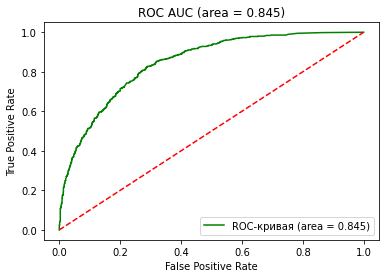

In [68]:
# train best_model
lgb_model = LGBMClassifier(random_state=42, learning_rate=0.025, n_estimators=100)
lgb_model.fit(X_train,y_train)


y_pred = lgb_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(lgb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(lgb_model.predict(X_test), y_test)

plot_roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])

### xgboost

In [71]:
parameters = {'eta': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'n_estimators': [10, 50, 100, 250, 500, 1000]}


xgb_model = XGBClassifier(random_state=42)
tuning_xgb = GridSearchCV(xgb_model, param_grid = parameters, n_jobs=-1)
tuning_xgb.fit(X_train,y_train)
result_cv = pd.DataFrame(tuning_xgb.cv_results_)

# get best params 
print(result_cv[result_cv['rank_test_score'] == 1].params)

8    {'eta': 0.025, 'n_estimators': 100}
Name: params, dtype: object


Train quality:
 Accuracy: 0.842
 Precision: 0.602
 Recall: 0.751
 f1_score: 0.668

Test quality:
 Accuracy: 0.799
 Precision: 0.494
 Recall: 0.661
 f1_score: 0.565


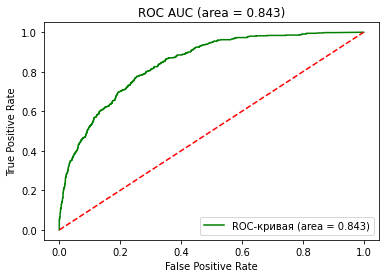

In [72]:
# train best_model
xgb_model = XGBClassifier(random_state=42, eta=0.025, n_estimators=100, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict_proba(X_test)[:,1]

print("Train quality:")
quality_report(xgb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(xgb_model.predict(X_test), y_test)

plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

### catboost

In [75]:
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'n_estimators': [10, 50, 100, 250, 500, 1000]}

ctb_model = CatBoostClassifier(random_state=42)
grid_ctb = GridSearchCV(estimator=ctb_model, param_grid = parameters, n_jobs=-1)
grid_ctb.fit(X_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6863322	total: 2.14ms	remaining: 1.07s
1:	learn: 0.6793119	total: 3.22ms	remaining: 802ms
2:	learn: 0.6723322	total: 4.28ms	remaining: 709ms
3:	learn: 0.6664394	total: 5.61ms	remaining: 696ms
4:	learn: 0.6598781	total: 6.84ms	remaining: 677ms
5:	learn: 0.6537835	total: 8.4ms	remaining: 692ms
6:	learn: 0.6485288	total: 9.74ms	remaining: 686ms
7:	learn: 0.6429856	total: 11.2ms	remaining: 688ms
8:	learn: 0.6374004	total: 12.8ms	remaining: 697ms
9:	learn: 0.6319339	total: 14.7ms	remaining: 723ms
10:	learn: 0.6265243	total: 16.5ms	remaining: 733ms
11:	learn: 0.6211406	total: 19.5ms	remaining: 792ms
12:	learn: 0.6160657	total: 21.2ms	remaining: 795ms
13:	learn: 0.6110810	total: 22.6ms	remaining: 786ms
14:	learn: 0.6063103	total: 24.9ms	remaining: 806ms
15:	learn: 0.6017014	total: 26.4ms	remaining: 799ms
16:	learn: 0.5973101	total: 27.6ms	remaining: 785ms
17:	learn: 0.5931512	total: 28.8ms	remaining: 771ms
18:	learn: 0.5890918	total: 30ms	remaining: 761ms
19:	learn: 0.5850556	tota

249:	learn: 0.3949436	total: 386ms	remaining: 386ms
250:	learn: 0.3947956	total: 388ms	remaining: 385ms
251:	learn: 0.3946119	total: 389ms	remaining: 383ms
252:	learn: 0.3944686	total: 390ms	remaining: 381ms
253:	learn: 0.3942845	total: 392ms	remaining: 380ms
254:	learn: 0.3940963	total: 394ms	remaining: 378ms
255:	learn: 0.3939382	total: 395ms	remaining: 377ms
256:	learn: 0.3937875	total: 397ms	remaining: 375ms
257:	learn: 0.3936590	total: 398ms	remaining: 373ms
258:	learn: 0.3935002	total: 399ms	remaining: 371ms
259:	learn: 0.3933760	total: 401ms	remaining: 370ms
260:	learn: 0.3932560	total: 402ms	remaining: 368ms
261:	learn: 0.3931086	total: 403ms	remaining: 366ms
262:	learn: 0.3930140	total: 405ms	remaining: 365ms
263:	learn: 0.3928281	total: 410ms	remaining: 367ms
264:	learn: 0.3926625	total: 412ms	remaining: 365ms
265:	learn: 0.3925363	total: 417ms	remaining: 367ms
266:	learn: 0.3924434	total: 419ms	remaining: 365ms
267:	learn: 0.3922828	total: 420ms	remaining: 364ms
268:	learn: 

493:	learn: 0.3697762	total: 773ms	remaining: 9.39ms
494:	learn: 0.3697093	total: 774ms	remaining: 7.82ms
495:	learn: 0.3696513	total: 776ms	remaining: 6.26ms
496:	learn: 0.3695729	total: 777ms	remaining: 4.69ms
497:	learn: 0.3694901	total: 778ms	remaining: 3.13ms
498:	learn: 0.3694401	total: 780ms	remaining: 1.56ms
499:	learn: 0.3693456	total: 781ms	remaining: 0us


GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f7f214d9820>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [77]:
result_cv = pd.DataFrame(grid_ctb.cv_results_)

# get best params 
print(result_cv[result_cv['rank_test_score'] == 1].params)

4    {'learning_rate': 0.01, 'n_estimators': 500}
Name: params, dtype: object


0:	learn: 0.6863322	total: 2.78ms	remaining: 1.39s
1:	learn: 0.6793119	total: 4.67ms	remaining: 1.16s
2:	learn: 0.6723322	total: 6.39ms	remaining: 1.06s
3:	learn: 0.6664394	total: 8.19ms	remaining: 1.01s
4:	learn: 0.6598781	total: 9.87ms	remaining: 977ms
5:	learn: 0.6537835	total: 11.6ms	remaining: 957ms
6:	learn: 0.6485288	total: 13ms	remaining: 918ms
7:	learn: 0.6429856	total: 15ms	remaining: 923ms
8:	learn: 0.6374004	total: 16.5ms	remaining: 901ms
9:	learn: 0.6319339	total: 18.2ms	remaining: 890ms
10:	learn: 0.6265243	total: 19.6ms	remaining: 870ms
11:	learn: 0.6211406	total: 20.9ms	remaining: 848ms
12:	learn: 0.6160657	total: 22.1ms	remaining: 826ms
13:	learn: 0.6110810	total: 23.5ms	remaining: 815ms
14:	learn: 0.6063103	total: 25ms	remaining: 810ms
15:	learn: 0.6017014	total: 27ms	remaining: 816ms
16:	learn: 0.5973101	total: 28.6ms	remaining: 812ms
17:	learn: 0.5931512	total: 30.2ms	remaining: 808ms
18:	learn: 0.5890918	total: 31.6ms	remaining: 801ms
19:	learn: 0.5850556	total: 33

247:	learn: 0.3953062	total: 388ms	remaining: 395ms
248:	learn: 0.3951081	total: 390ms	remaining: 393ms
249:	learn: 0.3949436	total: 391ms	remaining: 391ms
250:	learn: 0.3947956	total: 393ms	remaining: 389ms
251:	learn: 0.3946119	total: 394ms	remaining: 388ms
252:	learn: 0.3944686	total: 396ms	remaining: 386ms
253:	learn: 0.3942845	total: 397ms	remaining: 384ms
254:	learn: 0.3940963	total: 398ms	remaining: 383ms
255:	learn: 0.3939382	total: 400ms	remaining: 381ms
256:	learn: 0.3937875	total: 401ms	remaining: 380ms
257:	learn: 0.3936590	total: 403ms	remaining: 378ms
258:	learn: 0.3935002	total: 404ms	remaining: 376ms
259:	learn: 0.3933760	total: 406ms	remaining: 375ms
260:	learn: 0.3932560	total: 407ms	remaining: 373ms
261:	learn: 0.3931086	total: 409ms	remaining: 371ms
262:	learn: 0.3930140	total: 410ms	remaining: 370ms
263:	learn: 0.3928281	total: 412ms	remaining: 368ms
264:	learn: 0.3926625	total: 413ms	remaining: 367ms
265:	learn: 0.3925363	total: 415ms	remaining: 365ms
266:	learn: 

496:	learn: 0.3695729	total: 775ms	remaining: 4.68ms
497:	learn: 0.3694901	total: 777ms	remaining: 3.12ms
498:	learn: 0.3694401	total: 778ms	remaining: 1.56ms
499:	learn: 0.3693456	total: 779ms	remaining: 0us
Train quality:
 Accuracy: 0.832
 Precision: 0.580
 Recall: 0.730
 f1_score: 0.646

Test quality:
 Accuracy: 0.804
 Precision: 0.501
 Recall: 0.674
 f1_score: 0.575


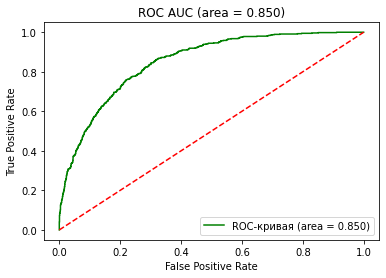

In [78]:
# train best model
ctb_model = CatBoostClassifier(random_state=42, learning_rate=0.01, n_estimators=500)
ctb_model.fit(X_train, y_train)

y_pred = ctb_model.predict_proba(X_test)[:,1]


print("Train quality:")
quality_report(ctb_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(ctb_model.predict(X_test), y_test)

plot_roc_curve(y_test, ctb_model.predict_proba(X_test)[:,1])